# Udacity's Data Analyst Nanodegree
## Project 2 - The Data Analysis Process

In this project we will analyze the No-Show Database.

***
### Importing necessary libraries:

In [472]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

---
### Loading database and performing initial checks:

In [473]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [474]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

The datatypes seem to be in order. It's noteworthy that Hipertension, Diabetes, Alcoholism, Handcap and SMS_received follow binary encoding ('yes'= 1 and 'no'=0).


In [475]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


All the info seems to be available, without NaNs whatsoever.

In [476]:

print(f"Are there duplicated patient ids? {'Yes' if any(df.PatientId.duplicated()) else 'No'}")
print(f"Are there duplicated appointment ids? {'Yes' if any(df.AppointmentID.duplicated()) else 'No'}")


Are there duplicated patient ids? Yes
Are there duplicated appointment ids? No


In [477]:
# There are no duplicated Appointment ID rows, thus we can drop them, assuming 
# they won't contribute to the analysis.
df.drop(['AppointmentID'],axis = 1, inplace = True)

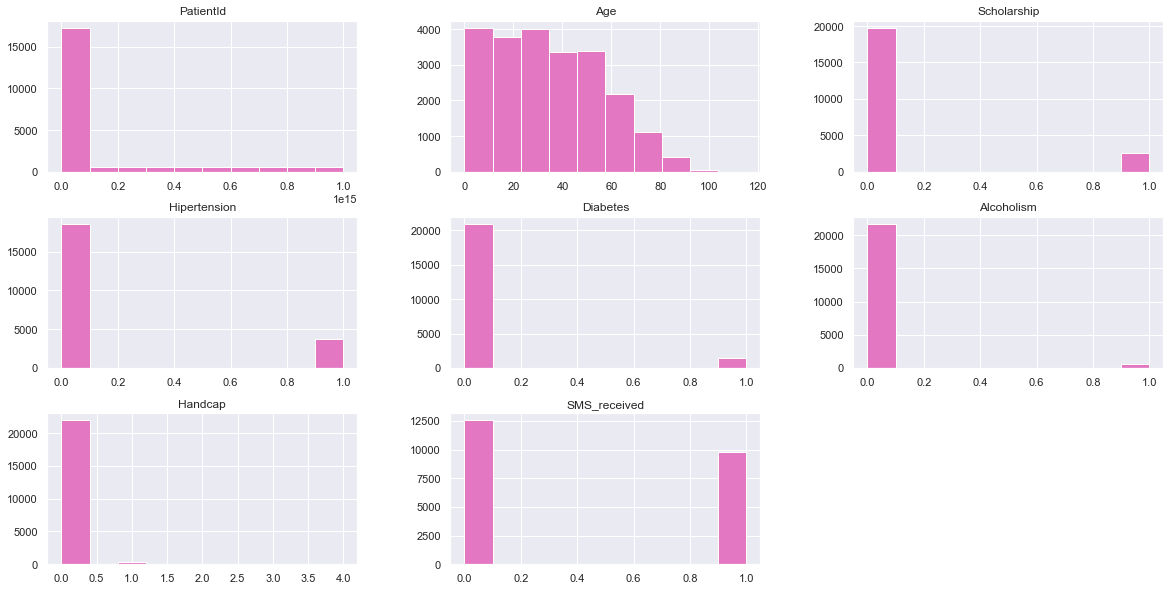

In [478]:
no_show = df['No-show'] == 'Yes' # patient did not show
yes_show = df['No-show'] == 'No' # patient did not show

df[no_show].hist(figsize=(20,10), color='tab:pink');
plt.show();

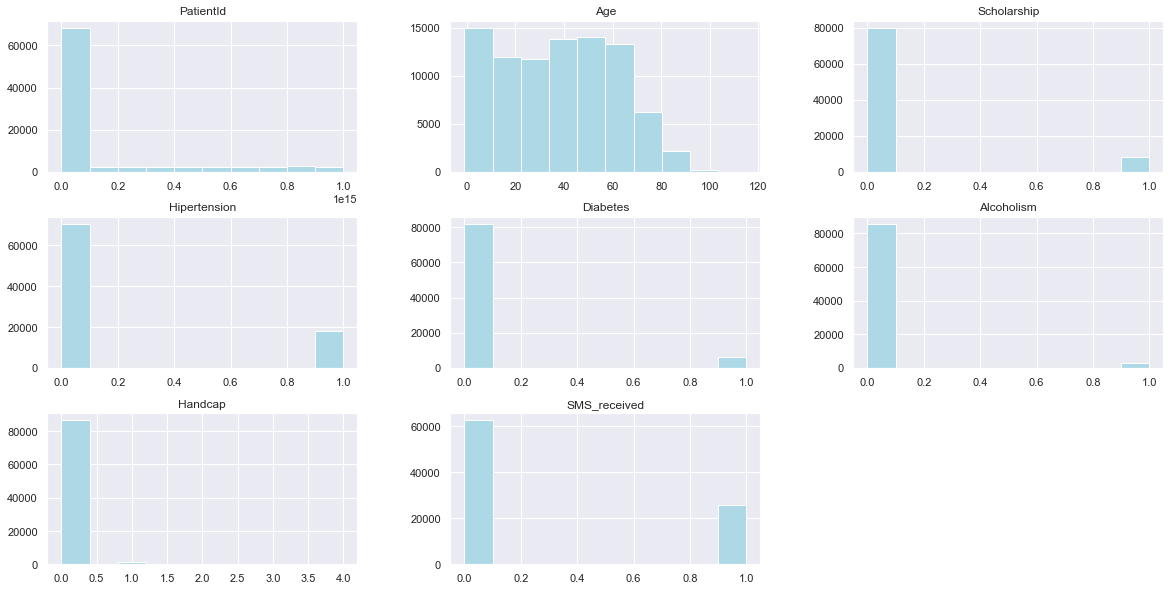

In [479]:
df[yes_show].hist(figsize=(20,10), color='lightblue');
plt.show();

Apart from age, the majority of above charted features are in binary. Meaning they can either be present or not for each appointment and individual.
Therefore:

* The majority of variables all seem to have the same distribution both in the show and no-show appointments

Which is reinforced by the statistics below:

In [480]:
df[no_show].describe()

,PatientId,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,2.231900e+04,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000
mean,1.467523e+14,34.317667,0.115507,0.169004,0.064071,0.030333,0.020297,0.438371
std,2.549905e+14,21.965941,0.319640,0.374764,0.244885,0.171505,0.156670,0.496198
min,5.628261e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.176779e+12,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.156794e+13,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.454270e+13,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.996585e+14,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [481]:
df[yes_show].describe()

,PatientId,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,8.820800e+04,88208.000000,88208.000000,88208.000000,88208.000000,88208.000000,88208.000000,88208.000000
mean,1.476845e+14,37.790064,0.093903,0.204392,0.073837,0.030417,0.022742,0.291334
std,2.563747e+14,23.338878,0.291695,0.403259,0.261507,0.171732,0.162750,0.454380
min,3.921784e+04,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.168386e+12,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.176184e+13,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.433715e+13,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


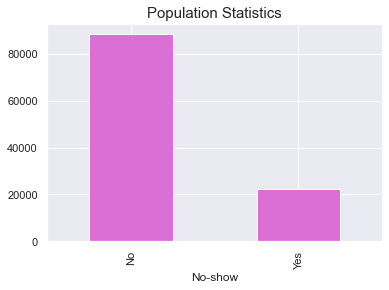

In [482]:
df.groupby('No-show')['PatientId'].count().plot(kind = 'bar',color = 'orchid'); plt.title('Population Statistics', fontsize = 15);

In [483]:
overall = pd.pivot_table(df, index = 'No-show',values=['Scholarship',	'Hipertension',	'Diabetes',	'Alcoholism',	'Handcap',	'SMS_received'], aggfunc = np.sum)
overall.reset_index(inplace=True)
overall

,No-show,Alcoholism,Diabetes,Handcap,Hipertension,SMS_received,Scholarship
0,No,2683,6513,2006,18029,25698,8283
1,Yes,677,1430,453,3772,9784,2578


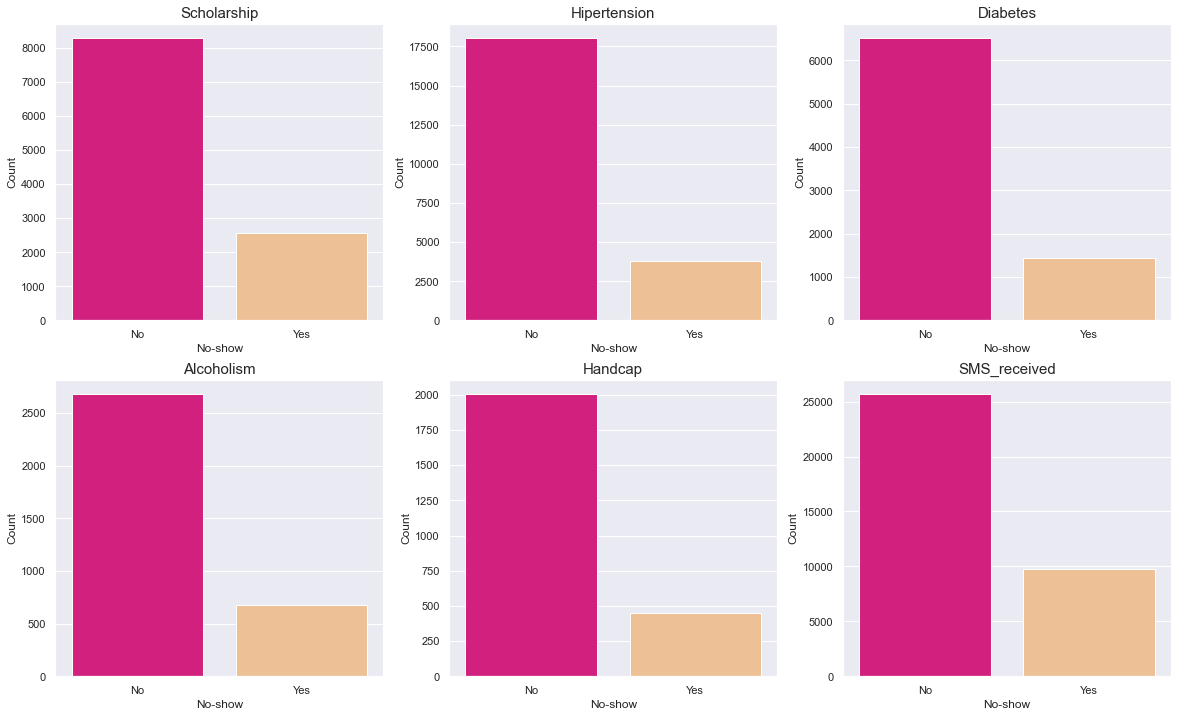

In [484]:
sns.set()
plt.figure(figsize=(20,12))
l = ['Scholarship',	'Hipertension',	'Diabetes',	'Alcoholism',	'Handcap',	'SMS_received']
for i in l:
    n = l.index(i)+1
    plt.subplot(2,3,n)
    sns.barplot(x='No-show',y=i,data=overall,palette='Accent_r')
    # plt.xticks(['yes','no'])
    plt.title(i, fontsize = 15);
    
    plt.ylabel('Count');
    

From the initial exploratory analysis above it seems like there is no clear relationship between not showing up and any of the above variables. Apparently, they all follow pretty much the same distribution from the population regardless of whether the patient showed up or not.

Having the scholarship (welfare program aid) and received sms seems to slightly increase the volume of no-shows.

---
## Delving deeper

Is there any particular feature more associated with not showing up?

In [485]:
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


But first, let's check how many of the no-shows were patients that have a tendency to be late:

In [486]:
df[df.PatientId.duplicated()]

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
27,1.215484e+13,F,2016-04-27T10:51:45Z,2016-04-29T00:00:00Z,4,CONQUISTA,0,0,0,0,0,0,No
154,1.925263e+10,F,2016-04-28T16:38:34Z,2016-04-29T00:00:00Z,30,ITARARÉ,0,0,0,0,0,0,No
288,2.246214e+13,M,2016-03-31T12:39:06Z,2016-04-29T00:00:00Z,43,CARATOÍRA,0,0,0,0,0,1,Yes
290,7.222383e+12,M,2016-04-11T09:50:18Z,2016-04-29T00:00:00Z,7,CARATOÍRA,0,0,0,0,0,1,No
316,1.756579e+13,F,2016-04-14T10:01:09Z,2016-04-29T00:00:00Z,1,JOANA D´ARC,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110521,3.635534e+13,F,2016-05-03T08:23:40Z,2016-06-07T00:00:00Z,53,MARIA ORTIZ,0,0,0,0,0,1,No
110522,2.572134e+12,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [487]:
top = df[no_show].groupby(['PatientId'], as_index=False)['No-show'].count()
top.sort_values('No-show', ascending = False)

,PatientId,No-show
3067,1.421987e+12,18
15734,5.635135e+14,16
5146,5.587790e+12,15
15814,5.811973e+14,14
11288,6.575144e+13,13
...,...,...
6460,8.286429e+12,1
6461,8.287416e+12,1
6462,8.293317e+12,1
6463,8.294383e+12,1


As we can infer from the table above, there is a number of patients that tend not to show up.
The biggest no-show offensor not having showed up 18 times.

Therefore, it is tentative to affirm that not having showed up before may be a red flag for the likelihood of not showing up again.

But, is it though? If we only look at absolute values we could end up not taking into account people who miss more appointments simply because they schedule more total appointments (for instance, people with poor health).

In [488]:
# Getting relative count of no-shows x total appointments per patient:
pat = df.groupby(['PatientId','No-show'], as_index=False)['Age'].count()
 
pat['per'] = pat.groupby('PatientId')['Age'].transform(lambda x: x/x.sum())
pat.rename(columns={'Age':'Count'},inplace = True)

pat

,PatientId,No-show,Count,per
0,3.921784e+04,No,1,1.0
1,4.374176e+04,No,1,1.0
2,9.377953e+04,No,1,1.0
3,1.417242e+05,No,1,1.0
4,5.376153e+05,No,1,1.0
...,...,...,...,...
71812,9.999320e+14,No,5,1.0
71813,9.999350e+14,No,1,1.0
71814,9.999465e+14,No,1,1.0
71815,9.999686e+14,No,1,1.0


In [489]:
# Considering top 10 offenders of the no-show criteria and comparing how many appointments they missed x not missed:
top_10 = top.sort_values('No-show', ascending = False).head(10)['PatientId'].values
pat[pat.PatientId.isin(top_10)].sort_values('PatientId')

,PatientId,No-show,Count,per
6811,4.768616e+11,No,1,0.083333
6812,4.768616e+11,Yes,11,0.916667
11863,1.198157e+12,No,11,0.478261
11864,1.198157e+12,Yes,12,0.521739
12368,1.421987e+12,Yes,18,1.000000
15119,2.728422e+12,No,4,0.266667
15120,2.728422e+12,Yes,11,0.733333
20937,5.587790e+12,No,5,0.250000
20938,5.587790e+12,Yes,15,0.750000
29349,9.715136e+12,No,9,0.450000


As we can see from the table above, the top 10 patients with highest amount of no-shows seem to have a tendency to miss appointments consistently.

All of the above have missed than they have attended. Some of them have not showed up even once, despite the amount of missed appointments (such as the Patient 1.421987e+12 who has missed a total of 18 appointments in a row without ever showing up).

Therefore, it is tentative to conclude that missing appointments in the past might be a good indicator of missing them again in the future, thus an **autoregressive relation** of sorts might be adequate.

In [490]:
nei = df.groupby(['Neighbourhood','No-show'], as_index=False)['Age'].count()
 
nei['per'] = nei.groupby('Neighbourhood')['Age'].transform(lambda x: x/x.sum())
nei.rename(columns={'Age':'Count'},inplace = True)

tot_nei = nei.copy()
nei[nei['No-show']=='Yes'].sort_values('Count', ascending = False)

,Neighbourhood,No-show,Count,per
76,JARDIM CAMBURI,Yes,1465,0.189841
86,MARIA ORTIZ,Yes,1219,0.209991
72,ITARARÉ,Yes,923,0.262664
117,RESISTÊNCIA,Yes,906,0.204469
21,CENTRO,Yes,703,0.210858
...,...,...,...,...
107,PONTAL DE CAMBURI,Yes,12,0.173913
63,ILHA DO BOI,Yes,3,0.085714
68,ILHAS OCEÂNICAS DE TRINDADE,Yes,2,1.000000
65,ILHA DO FRADE,Yes,2,0.200000


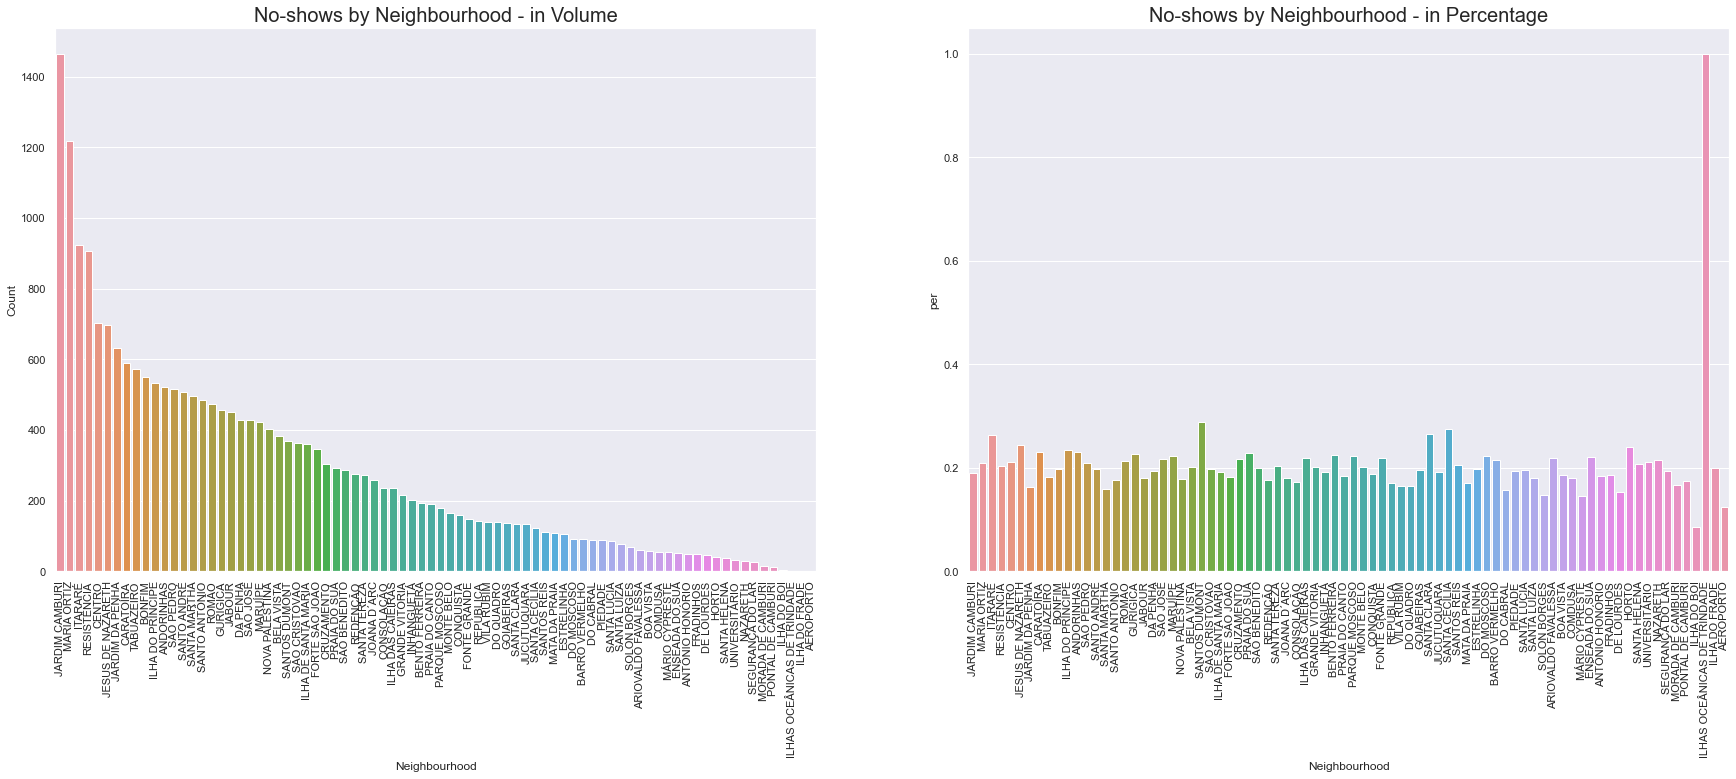

In [491]:
nei = nei[nei['No-show']=='Yes'].sort_values('Count', ascending = False)
nei.sort_values('Count', ascending = False, inplace = True)
plt.figure(figsize=(30,10))
sns.set()
plt.subplot(121)
sns.barplot(x='Neighbourhood', y ='Count', data = nei, ci = None);
plt.xticks(rotation=90);
plt.title("No-shows by Neighbourhood - in Volume", fontsize=20)
plt.subplot(122)
sns.barplot(x='Neighbourhood', y ='per', data = nei,ci = None);
plt.xticks(rotation=90);
plt.title("No-shows by Neighbourhood - in Percentage", fontsize=20);

The neighbourhood feature represents the location of the hospital.

When looking exclusively at volume, it would seem like JARDIM CAMBURI has the most no-shows, but, in reality, it simply has the highest volume of visits. Hence, the importance of checking no-shows relative to total appointments (right chart). From the left chart we can infer only the volumes and, perhaps, that the neighbourhoods to the left are located in more densely populated areas, therefore boasting of a higher volume of appointments.

As we can see in the right chart the majority of hospitals tend to have a no-show rate in the neighbourhood of 20-30%, with an obvious outlier being the hospital in ILHAS OCEANICAS DE TRINDADE.
Let's check it out next:

In [492]:
tot_nei[tot_nei.Neighbourhood == 'ILHAS OCEÂNICAS DE TRINDADE']

,Neighbourhood,No-show,Count,per
68,ILHAS OCEÂNICAS DE TRINDADE,Yes,2,1.0


It is not an aberrant observation at all: it only has 2 appointments in the database, both no-shows.

***
Does it have anything to do with **age**?

In [493]:
df[no_show].groupby('Age')['No-show'].count().sort_values(ascending=False).head(10)

Age
0     639
1     415
17    396
19    394
30    369
9     364
21    355
20    355
16    353
25    352
Name: No-show, dtype: int64

As seem above, the 2 ages with higher no-show volumes are 0 and 1. But what about no-show percentage relative to total per age cohorts?

In [494]:
age = df.groupby(['Age','No-show'], as_index=False)['PatientId'].count()
 
age['per'] = age.groupby('Age')['PatientId'].transform(lambda x: x/x.sum())
age.rename(columns={'PatientId':'Count'},inplace = True)

tot_age = age.copy()
age[age['No-show']=='Yes'].sort_values('Count', ascending = False)


,Age,No-show,Count,per
2,0,Yes,639,0.180559
4,1,Yes,415,0.182578
36,17,Yes,396,0.262425
40,19,Yes,394,0.255016
62,30,Yes,369,0.242604
...,...,...,...,...
192,95,Yes,6,0.250000
203,115,Yes,3,0.600000
196,97,Yes,2,0.181818
194,96,Yes,1,0.058824


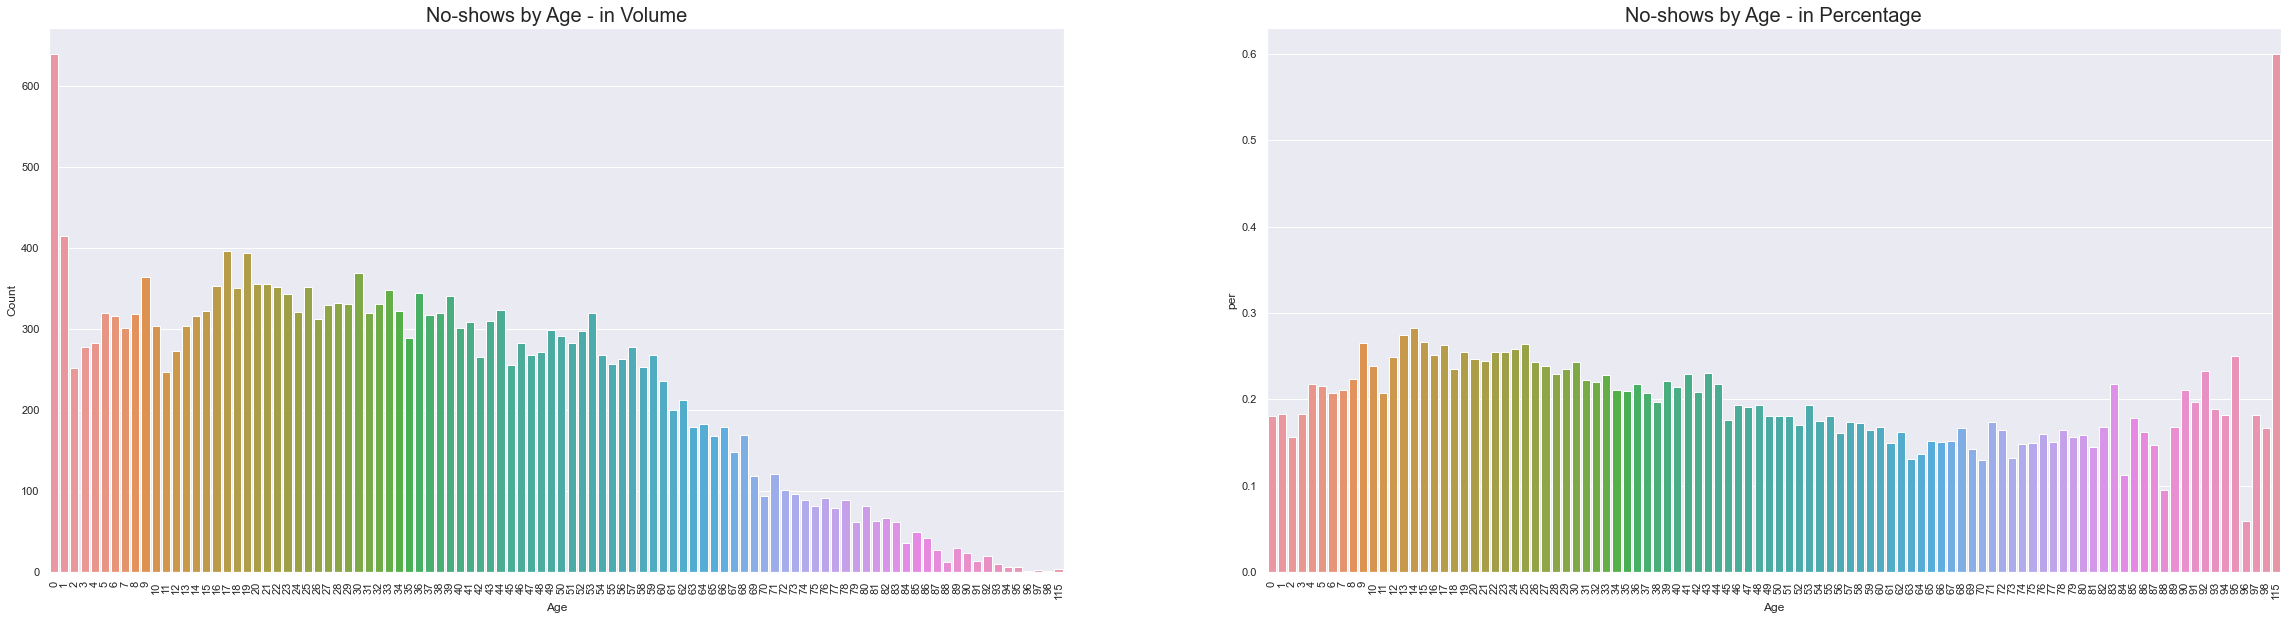

In [495]:
age = age[age['No-show']=='Yes'].sort_values('Age', ascending = True)
age.sort_values('Count', ascending = False, inplace = True)
plt.figure(figsize=(40,10))
sns.set()
plt.subplot(121)
sns.barplot(x='Age', y ='Count', data = age, ci = None);
plt.xticks(rotation=90);
plt.title("No-shows by Age - in Volume", fontsize=20)
plt.subplot(122)
sns.barplot(x='Age', y ='per', data = age,ci = None);
plt.xticks(rotation=90);
plt.title("No-shows by Age - in Percentage", fontsize=20);

The total amount of no-shows is bigger for newborns. However, when taking into account the number of appointments, it is made clear that is so simply due to the sheet amount of appointments for newborn patients (which makes sense). When considering percentage of no-shows per total appointments per age cohort, it is clear that adolescents and young adults tend to miss the appointments more often, in contrast to the elderly missing less appointments, but the difference is not stark. Also, there is an outlier at the 115 years old cohort. Let's delve deeper into that:

In [496]:
tot_age[tot_age.Age == 115]

,Age,No-show,Count,per
202,115,No,2,0.4
203,115,Yes,3,0.6


Once more we can not draw conclusions about the 115 age cohort because there are way too few observations available.

***
Maybe it is a matter of **gender**?

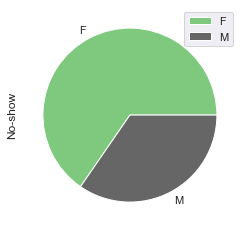

In [497]:
gend=df[no_show].groupby('Gender')[['No-show']].count().plot(kind='pie',subplots=True,cmap='Accent');


At first glance, there seems the majority of no-shows are from women.

In [498]:
df.groupby('Gender')[['No-show']].count()

,No-show
Gender,
F,71840
M,38687


However, when checking the whole sample we can see there are clearly more women than men, regardless of showing up or not. The amount of female patients is almost twofold the amount of male patients.

Which makes sense, considering in Brazil it is a well-known statistic / fact  that women tend to care better for their health.

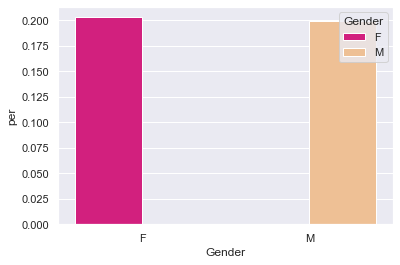

In [499]:
gend = df.groupby(['Gender','No-show'], as_index=False)['PatientId'].count()
 
gend['per'] = gend.groupby('Gender')['PatientId'].transform(lambda x: x/x.sum())
gend.rename(columns={'PatientId':'Count'},inplace = True)
sns.barplot(data = gend[gend['No-show']=='Yes'][['Gender','per']], x='Gender',hue ='Gender', y='per',palette ='Accent_r');

When taking into consideration the gender totals we get that both genders have approximately 20% of no-shows. Therefore, when it comes to showing up/not , gender seems to be irrelevant.

***
# Binary Features Analysis
***
## Chronic Disease

Let us assume a strong _a priori_ that people with grave chronic disease tend to be more dilligent with their healthcare. Therefore, we'll investigate whether people with that have each of them tend to show up more often.

In [500]:
df['No-show'] = df.copy()['No-show'].map({'Yes': 1,'No': 0})
df_dis = df[['Hipertension','Diabetes','No-show']]
df_dis

,Hipertension,Diabetes,No-show
0,1,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,1,1,0
...,...,...,...
110522,0,0,0
110523,0,0,0
110524,0,0,0
110525,0,0,0


In [501]:
hipertension = df.groupby(['Hipertension','No-show'], as_index=False)['PatientId'].count()
hipertension['per'] = hipertension.groupby('Hipertension')['PatientId'].transform(lambda x: x/x.sum())
hipertension.rename(columns={'PatientId':'Volume'}, inplace = True)
hipertension

,Hipertension,No-show,Volume,per
0,0,0,70179,0.790963
1,0,1,18547,0.209037
2,1,0,18029,0.826980
3,1,1,3772,0.173020


In [502]:
diabetes = df.groupby(['Diabetes','No-show'], as_index=False)['PatientId'].count()
diabetes['per'] = diabetes.groupby('Diabetes')['PatientId'].transform(lambda x: x/x.sum())
diabetes.rename(columns={'PatientId':'Volume'}, inplace = True)
diabetes

,Diabetes,No-show,Volume,per
0,0,0,81695,0.796372
1,0,1,20889,0.203628
2,1,0,6513,0.819967
3,1,1,1430,0.180033


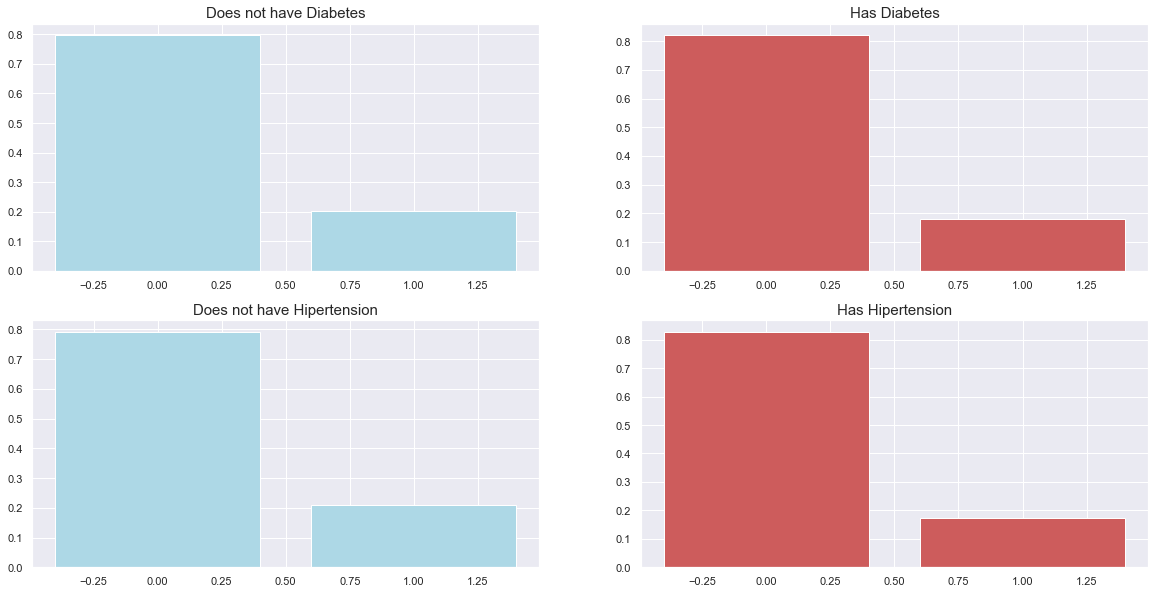

In [503]:
# Diabetes:
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.bar(x = diabetes[diabetes['Diabetes']==0]['No-show'], height = diabetes[diabetes['Diabetes']==0]['per'], color = 'lightblue')
plt.title('Does not have Diabetes',fontsize=15)
plt.subplot(222)
plt.bar(x = diabetes[diabetes['Diabetes']==1]['No-show'], height = diabetes[diabetes['Diabetes']==1]['per'], color = 'indianred')
plt.title('Has Diabetes',fontsize=15);

# Hipertension:
plt.subplot(223)
plt.bar(x = hipertension[hipertension['Hipertension']==0]['No-show'], height = hipertension[hipertension['Hipertension']==0]['per'], color = 'lightblue')
plt.title('Does not have Hipertension',fontsize=15)
plt.subplot(224)
plt.bar(x = hipertension[hipertension['Hipertension']==1]['No-show'], height = hipertension[hipertension['Hipertension']==1]['per'], color = 'indianred')
plt.title('Has Hipertension',fontsize=15);

Above we have percentual comparison for the two chronic diseases. Neither seems to impact no-show volume so much: only a small decrease in missed appointments is made evident by the charts above (percentage of total was used to ascertain both groups would be comparable).

Let us check the correlation table.

In [504]:
df_dis[['Hipertension','Diabetes','No-show']].corr()

,Hipertension,Diabetes,No-show
Hipertension,1.000000,0.433086,-0.035701
Diabetes,0.433086,1.000000,-0.015180
No-show,-0.035701,-0.015180,1.000000


From the Pearson linear correlations above we can see that there is indeed a negative correlation between having any of the diseases and not showing up. Thus, to a small extent, those afflicted tend to miss slightly less appointments.

One would think having grave chronic diseases such as those would increase the attention to health of those afflicted, but it seems they miss appointments just as much as healthy individuals.

It is important to observe that a strong positive correlation between Hipertension and Diabetes is shown, which sheds light to the possibility that having either of those increases the likelihood of having the other as well.

In [505]:
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


***
## Alcoholism

Do alcoholics miss more appointments?

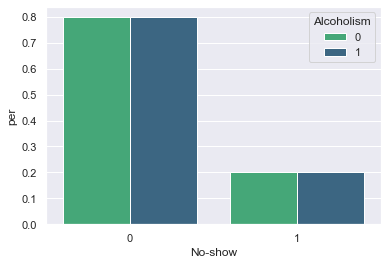

In [506]:
alco = df.groupby(['Alcoholism','No-show'], as_index=False)['PatientId'].count()
alco['per'] = alco.groupby('Alcoholism')['PatientId'].transform(lambda x: x/x.sum())
alco.rename(columns={'PatientId':'Volume'}, inplace = True)
sns.barplot(data = alco, x = 'No-show', y = 'per', hue ='Alcoholism', palette='viridis_r');

Alcoholism does not seem to play any part in missing appointments whatsoever.

***
## Handcap

Do hadcapped people miss more / less appointments?

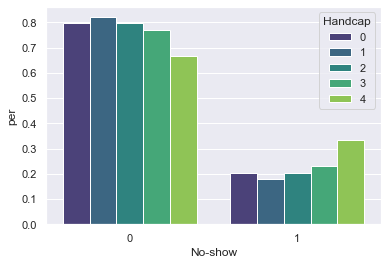

In [507]:
hand = df.groupby(['Handcap','No-show'], as_index=False)['PatientId'].count()
hand['per'] = hand.groupby('Handcap')['PatientId'].transform(lambda x: x/x.sum())
hand.rename(columns={'PatientId':'Volume'}, inplace = True)
sns.barplot(data = hand, x = 'No-show', y = 'per', hue ='Handcap', palette='viridis');

It seems like the volume of missed appointments increases with the severity of the handcap.
People with less severe handcaps (1,2) tend to be more dilligent with their appointments than people who don't have any (0), but from handcap =3 to 4 both the no-shows amount increases. Maybe it is due to how hard it is for people in these cohorts to travel to the hospital (having more physical restrictions).

***
## SMS - received

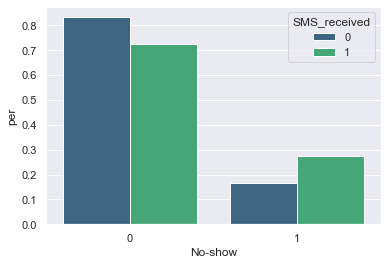

In [508]:
sms = df.groupby(['SMS_received','No-show'], as_index=False)['PatientId'].count()
sms['per'] = sms.groupby('SMS_received')['PatientId'].transform(lambda x: x/x.sum())
sms.rename(columns={'PatientId':'Volume'}, inplace = True)
sns.barplot(data = sms, x = 'No-show', y = 'per', hue ='SMS_received', palette='viridis');

The above is counter-intuitive: the percentage of no-shows increases from around 18% (for people who did not receive sms) to 28% (for people who did).


In [509]:
df[['SMS_received','No-show']].corr()

,SMS_received,No-show
SMS_received,1.000000,0.126431
No-show,0.126431,1.000000


It is further shown from the linear correlation table above that there is a significant positive correlation between receiving sms and not showing up. 

Maybe people simply don't like being bothered? ( ͡° ͜ʖ ͡°)

***
## Scholarship

Health and receiving welfare doesn't seem to compete. 

Although maybe, if we consider receiving welfare as a proxy for poverty (which is the case for Bolsa Familia), we can test whether people with less means are more likely to miss apointments or not.

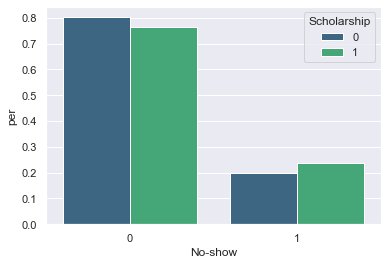

In [510]:
welf = df.groupby(['Scholarship','No-show'], as_index=False)['PatientId'].count()
welf['per'] = welf.groupby('Scholarship')['PatientId'].transform(lambda x: x/x.sum())
welf.rename(columns={'PatientId':'Volume'}, inplace = True)
sns.barplot(data = welf, x = 'No-show', y = 'per', hue ='Scholarship', palette='viridis');

In [511]:
df[['Scholarship','No-show']].corr()

,Scholarship,No-show
Scholarship,1.000000,0.029135
No-show,0.029135,1.000000


Once again, a small impact: receiving Bolsa Familia aid increases by a small margin the no-show volume.

**Conclusion for Binary Variables**:
'Scholarship',	'Hipertension',	'Diabetes', 'Handcap' &	'SMS_received' all seem to impact attendance by a small amount, as seem above, with each having small correlations to attendance. The only binary feature that does not seem to impact attendance at all is Alcoholism.

***
# Appointment and Schedule Dates Analysis

In [512]:
days = df[['ScheduledDay','AppointmentDay','No-show']]
days

,ScheduledDay,AppointmentDay,No-show
0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,0
1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,0
2,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,0
3,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,0
4,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,0
...,...,...,...
110522,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,0
110523,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,0
110524,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,0
110525,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,0


From the looks of it we have:

* date AND hour for when the appointment was scheduled.
* just date for the appointment date

Therefore, we can't make assumptions about traffic during rush hours and such, as the actual appointments scheduled hour is absent.

In [513]:

days['app_day'] = pd.to_datetime(days['AppointmentDay']).dt.day_name()
days['wait_time'] = pd.to_datetime(days['AppointmentDay']).dt.date - pd.to_datetime(days['ScheduledDay']).dt.date
days

<ipython-input-513-16965bbc9819>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  days['app_day'] = pd.to_datetime(days['AppointmentDay']).dt.day_name()
<ipython-input-513-16965bbc9819>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  days['wait_time'] = pd.to_datetime(days['AppointmentDay']).dt.date - pd.to_datetime(days['ScheduledDay']).dt.date


,ScheduledDay,AppointmentDay,No-show,app_day,wait_time
0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,0,Friday,0 days
1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,0,Friday,0 days
2,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,0,Friday,0 days
3,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,0,Friday,0 days
4,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,0,Friday,0 days
...,...,...,...,...,...
110522,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,0,Tuesday,35 days
110523,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,0,Tuesday,35 days
110524,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,0,Tuesday,41 days
110525,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,0,Tuesday,41 days


Above we added both the day of the appointment and the time (in days) between schedule date and appointment.

The goal here is to:

* **check whether there is a specific day of the week related to more missed appointments**
* **check if people forget their appointments. More days between schedule and appointment should be correlated to more missed apointments.**

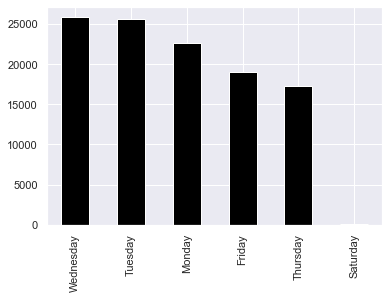

In [514]:
days['app_day'].value_counts().plot(kind = 'bar', color = 'black');

There are no appointments on Saturdays. The day with highest number of appointments is Wednesday.

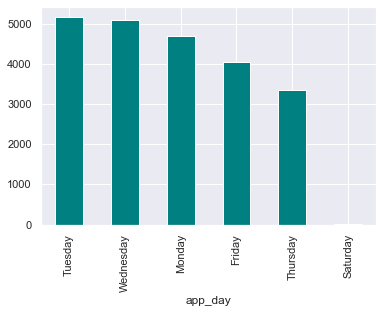

In [515]:
days.groupby('app_day')['No-show'].sum().sort_values(ascending=False).plot(kind = 'bar', color = 'teal');

Although the top two days reverse when it comes to no-show volume, the amount is proportional to the volume (black chart), displaying more or less the same shape through the days.

Therefore, the day of the week does not seem to influence missed appointments volume.

In [516]:
#converting wait time in a discrete int number:
days['wait_time'] = days['wait_time'].astype('timedelta64[D]')
days = days[days.wait_time >=0] # To remove errors (there can't be negative wait times, logically impossible)
days[['No-show', 'wait_time']].corr()

<ipython-input-516-7051bfcdcefa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  days['wait_time'] = days['wait_time'].astype('timedelta64[D]')


,No-show,wait_time
No-show,1.000000,0.186322
wait_time,0.186322,1.000000


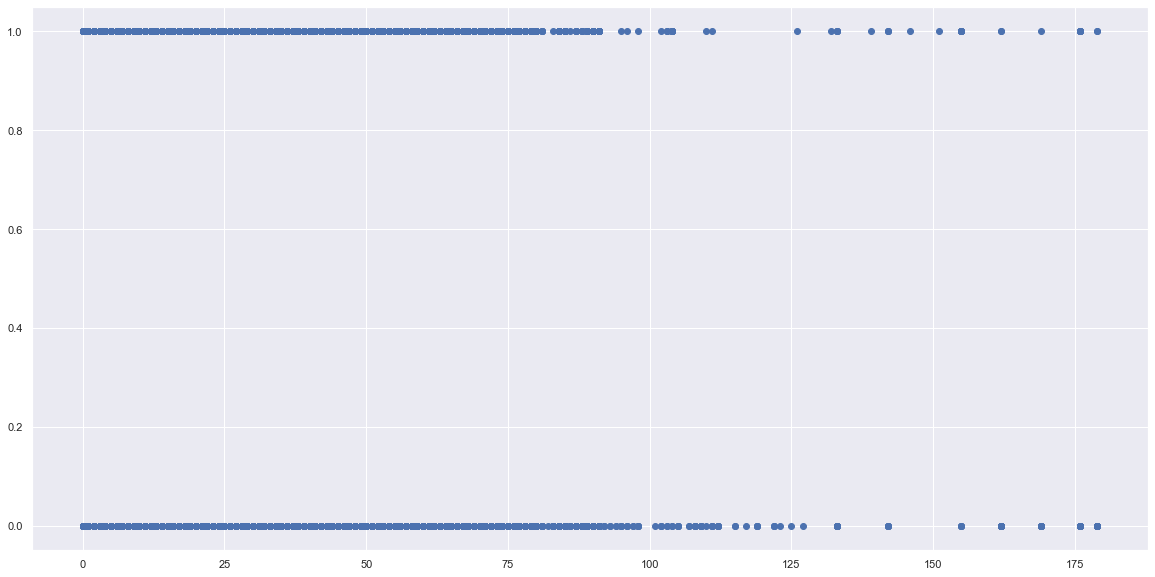

In [534]:
plt.figure(figsize=(20,10))
plt.scatter(days['wait_time'], days['No-show']);

We can conclude that, although week day does not have importance related to no-shows, the wait time does.

A significant positive correlation is seem above and further reinforced by the spreadchart

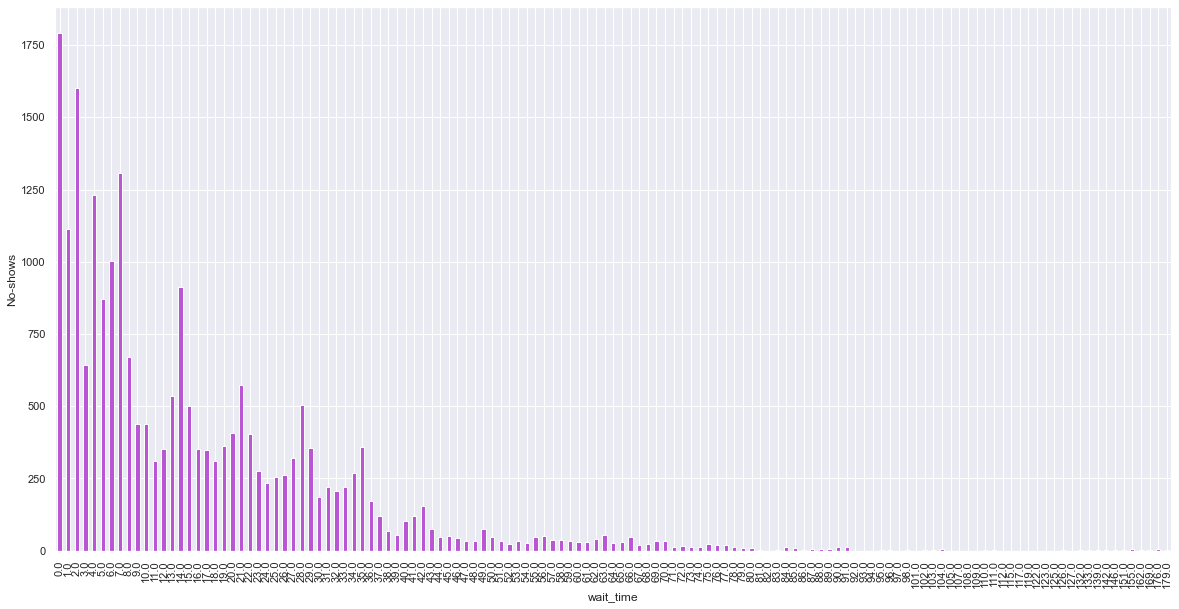

In [544]:
plt.figure(figsize=(20,10))
days.groupby('wait_time')['No-show'].sum().plot(kind='bar', color='mediumorchid');
plt.ylabel('No-shows');

In volume there are more no-shows registered for appointments scheduled in the same day (wait time = 0). But that just goes to show that the majority of appointments are scheduled in the nick of time.

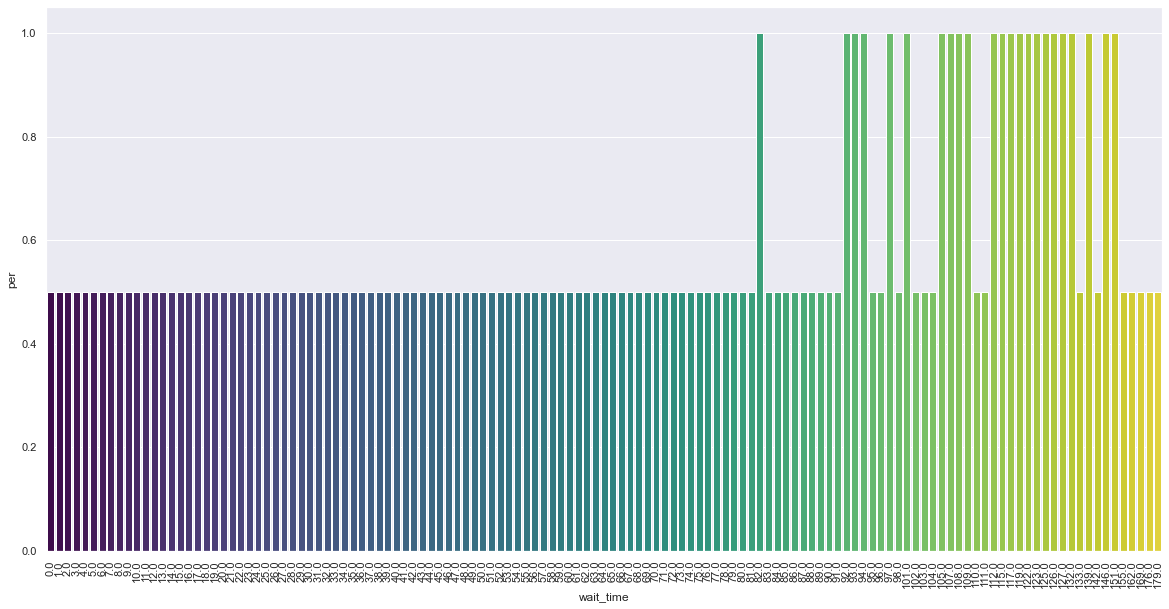

In [549]:
plt.figure(figsize=(20,10))
wait = days.groupby(['wait_time','No-show'], as_index=False)['app_day'].count()
wait['per'] = wait.groupby('wait_time')['app_day'].transform(lambda x: x/x.sum())
sns.barplot(data = wait, x = 'wait_time', y = 'per', palette='viridis', ci = False);
plt.xticks(rotation = 90);

When taking into account the percentage of no-shows per total appointments per wait time we get the exact same conclusion as the correlations table and scatterplot above: 

In [550]:
wait.sort_values('per', ascending = False)

,wait_time,No-show,app_day,per
190,97.0,0,2,1.000000
164,82.0,0,1,1.000000
184,93.0,0,2,1.000000
220,139.0,1,1,1.000000
185,94.0,0,2,1.000000
...,...,...,...,...
228,162.0,1,2,0.181818
172,86.0,1,1,0.166667
230,169.0,1,1,0.125000
166,83.0,1,1,0.125000


***
# Conclusions:

In [552]:
df.head(0)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


* **Disease and Hipertension**: strongly correlated amongst themselves. Hence, if an individual has one he could likely have the other as well. The presence of any seems to be negative correlated to missing appointments, to a small extent.

* **Gender, Neighbourhood & Alcoholism**: all proved to be irrelevant to predict no-shows. Specially when analyzing in percentual terms.

* **Handcap**: the presence of handcap does not affect attendance for the low levels of severity. However, from Handcap = 3 to 4 the attendence reduces considerably, shedding light on how hard it must be for those afflicted to move to the appointment and make it in time.

* **Scholarship & SMS_received**: both behaved the opposite of what we expected, as both increase in percentual terms the no-shows. Hence, financially challenged people tend to miss more appointments (maybe it has to do with the public transport system) and those who receive SMS reminders also tend to miss their appointments more frequently.

* **Age, Wait Time, PatientId**: all of these proved to be significant for predicting no-shows. The elderly tend to miss less apointments on average (they might take better care of their health). We used appointment and scheduled day to obtain wait_time, which also seems to play a part in explaining missed appointments: the longer the wait, the more likely it is the patient forgets the appointment, hence the higher the no-show rates. Employing PatientId as a proxy to get the repeat offenders of the no-show statistic, we found that some people simply tend to miss more appointments. Perhaps previous unattendances might be considered as red flags, signaling that said individual is prone to miss his / her appointments.

If we were to train a model in this project, we would go with the following features to explain no-shows: Age, Wait Time, Repeated Offenders and Handcap.